# Alzheimer's Disease and Healthy Aging

In [69]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Import data
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Since the relevant categorical variables (gender, ethnicity, education level etc.) are already encoded as integers, we will not have to perform One Hot Encoding on these columns.

In [72]:
# Checking for null values
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# Data Cleaning

### Dropped columns
* __PatientID__ (Doesn't tell us anything useful)
* __DoctorInCharge__ (Confidential and doesn't tell us anything useful)

### Null Values
* There are luckily no null values so we will not have to perform any imputing

In [73]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [74]:
# Checking for duplicates
df.duplicated().sum()

0

# Feature Engineering

1. Age Groups
    - This attribute was created to make analysis easier by treating age as a categorical factor, which also helps if the impact of age on diagnosis isn't linear
2. Health Score
    - This metric is a combination of health measures into one score. A higher health score indicates better overall health
3. Cardiometabolic index
    - Combining __SystolicBP__, __CholesterolTotal__, __CholesterolLDL__, __CholesterolHDL__, and __CholesterolTriglycerides__ into a single score reflecting overall cardiovascular and metabolic health
4. Count of Health Issues
    - Combining __FamilyHistoryAlzheimers__, __CardiovascularDisease__, __Diabetes__, __Depression__, __HeadInjury__, __Hypertension__ into a count of health issues according to medical history
5. Education + Ethnicity
    - Highlights the interaction between the two variables.
        - 0_0 represents a Caucasian with no education
        - 0_1 represents a Caucasian with a high school diploma
        - 0_2 represents a Caucasian with a bachelor's degree
        - 0_3 represents a Caucasian with an advanced degree
        - The same applies for 1_X (African American), 2_X (Asian), or 3_X (Other)

In [75]:
# Creating age groups 
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 50, 60, 70, 80, np.inf], labels=['<50', '50-59', '60-69', '70-79', '80+'])

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# since 'Smoking' is 0 for NO and 1 for YES, we should reverse this as smoking is bad for health
df['Smoking'] = 1 - df['Smoking']

# since 'AlcoholConsumption' is weekly alcohol consumption units, reducing consumption is typically better for health
# this line transforms the column to reflect higher values meaning lower alcohol consumption, thus better health
df['AlcoholConsumption'] = 1 - scaler.fit_transform(df[['AlcoholConsumption']])

health_columns = ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Smoking', 'AlcoholConsumption']

# Normalize other health_columns
df[health_columns] = scaler.fit_transform(df[health_columns])

df['HealthScore'] = df[health_columns].sum(axis=1)

In [77]:
# Creating cardiometabolic index
cardiometabolic_columns = ['SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
df[cardiometabolic_columns] = scaler.fit_transform(df[cardiometabolic_columns])
df['CardiometabolicIndex'] = df[cardiometabolic_columns].sum(axis=1)

In [78]:
# Creating count of health issues
health_issues_columns = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
df['NumHealthIssues'] = df[health_issues_columns].sum(axis=1)

In [79]:
# Creating Education + Ethnicity
df['EducationEthnicity'] = df['Ethnicity'].astype(str) + "_" + df['EducationLevel'].astype(str)

In [80]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,AgeGroup,HealthScore,CardiometabolicIndex,NumHealthIssues,EducationEthnicity
0,73,0,0,2,0.316960,1.0,0.334817,0.633375,0.133931,0.837564,...,0,0,1,0,0,70-79,3.256646,1.730215,2,0_2
1,89,0,0,0,0.473058,1.0,0.772830,0.762862,0.050995,0.525021,...,0,0,0,1,0,80+,3.584765,3.214663,0,0_0
2,73,0,3,1,0.111553,1.0,0.021724,0.785408,0.181896,0.945597,...,1,0,1,0,0,70-79,3.046179,2.401503,1,3_1
3,74,1,0,1,0.752163,0.0,0.389249,0.843804,0.743443,0.731994,...,0,0,0,0,0,70-79,3.460653,1.734766,0,0_1
4,89,0,0,0,0.228472,1.0,0.076796,0.631707,0.078698,0.265892,...,0,1,1,0,0,80+,2.281564,2.063399,0,0_0


# Exploratory Data Analysis

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,0.506199,0.288883,0.000000,0.264272,0.512933,0.754923,1.000000
Smoking,2149.0,0.711494,0.453173,0.000000,0.000000,1.000000,1.000000,1.000000
AlcoholConsumption,2149.0,0.497809,0.288079,0.000000,0.241722,0.503064,0.742946,1.000000
PhysicalActivity,2149.0,0.492456,0.286182,0.000000,0.257117,0.477053,0.743632,1.000000
DietQuality,2149.0,0.498926,0.291227,0.000000,0.245178,0.507230,0.755758,1.000000
SleepQuality,2149.0,0.508312,0.294065,0.000000,0.246843,0.519077,0.760335,1.000000


Takeaways:
- The people in this dataset, on average, are less educated (1.2)
- There are more smokers in this dataset (0.71)
- Physical activity, diet quality, and sleep quality are generally average, at around 0.5

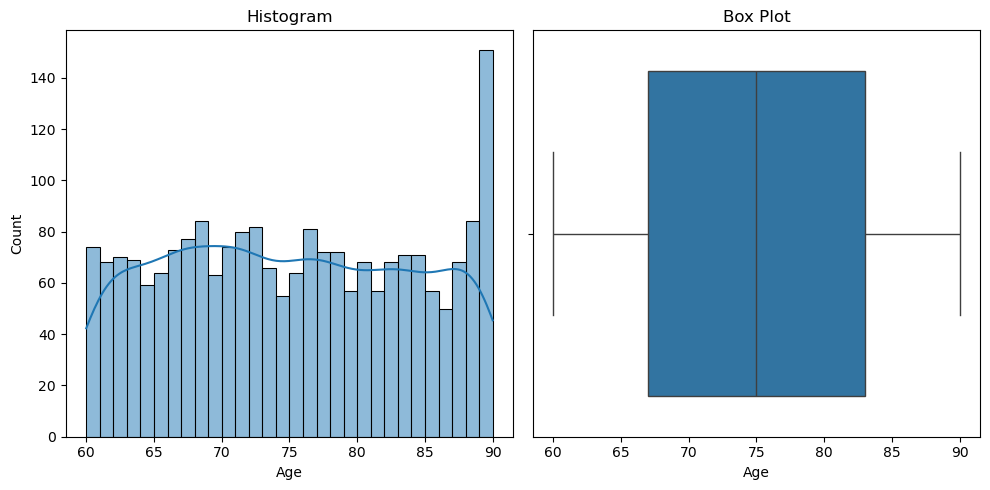

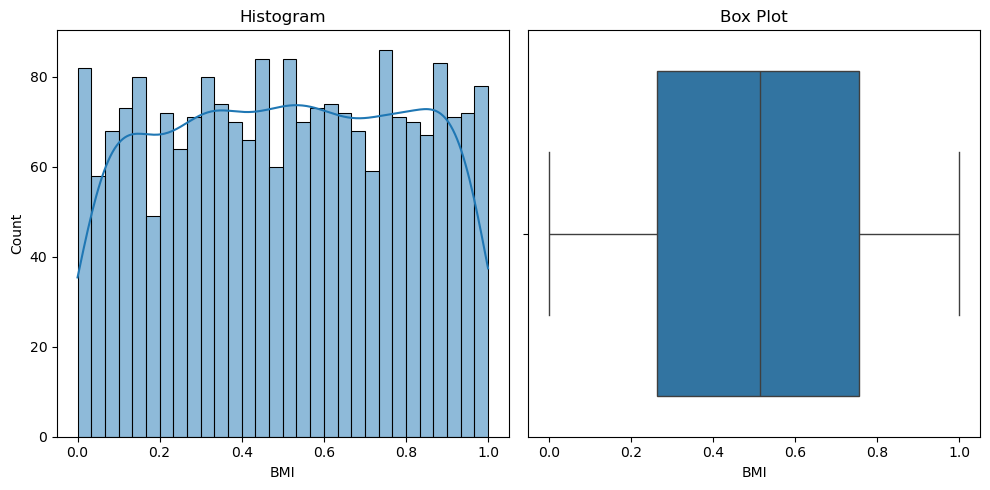

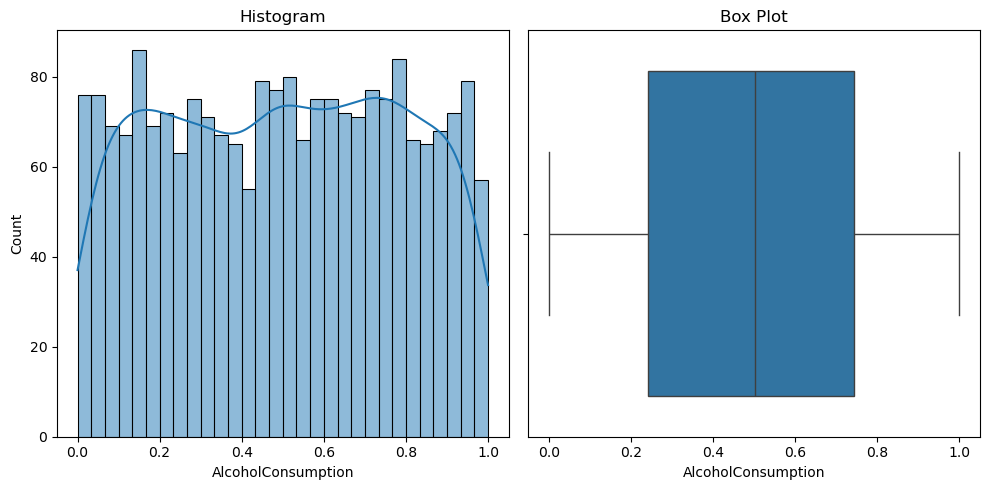

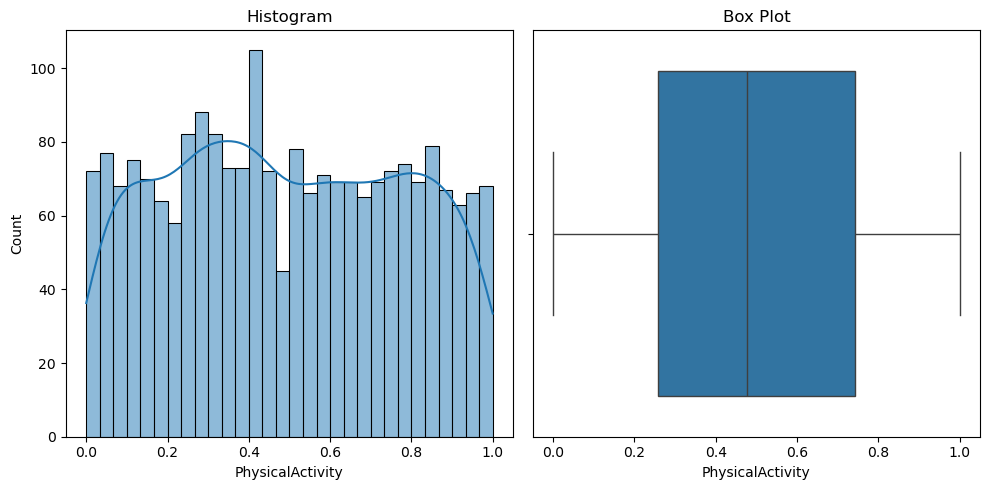

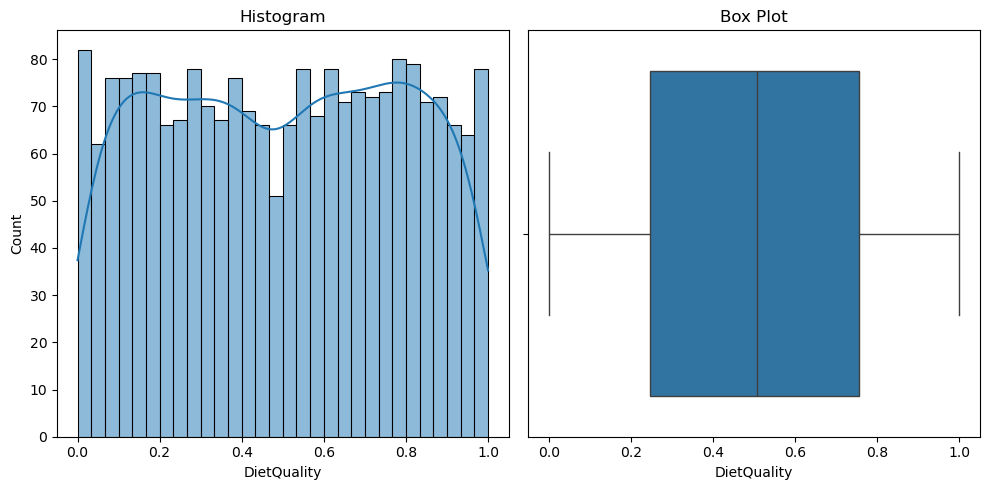

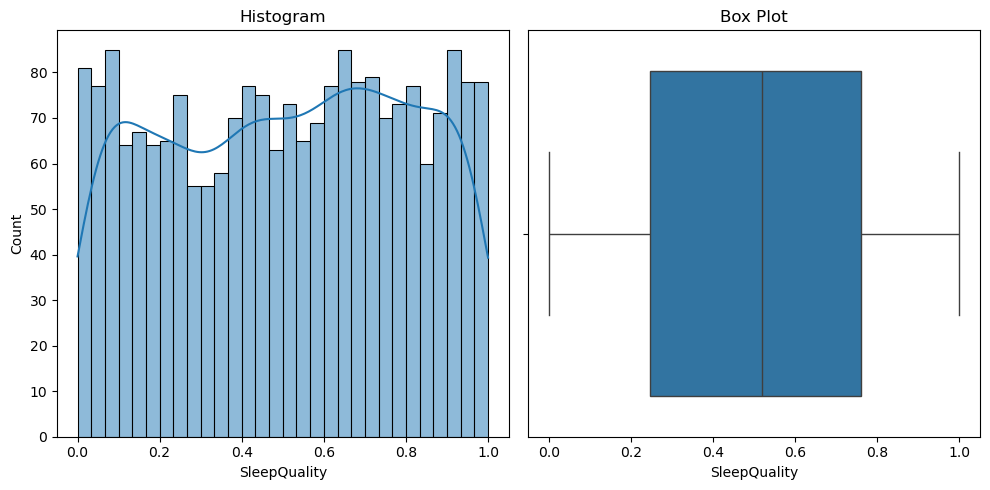

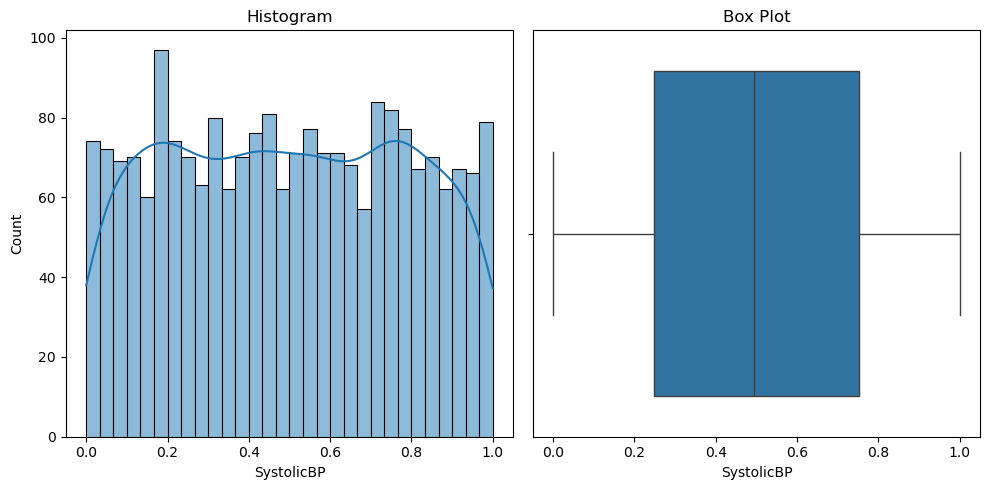

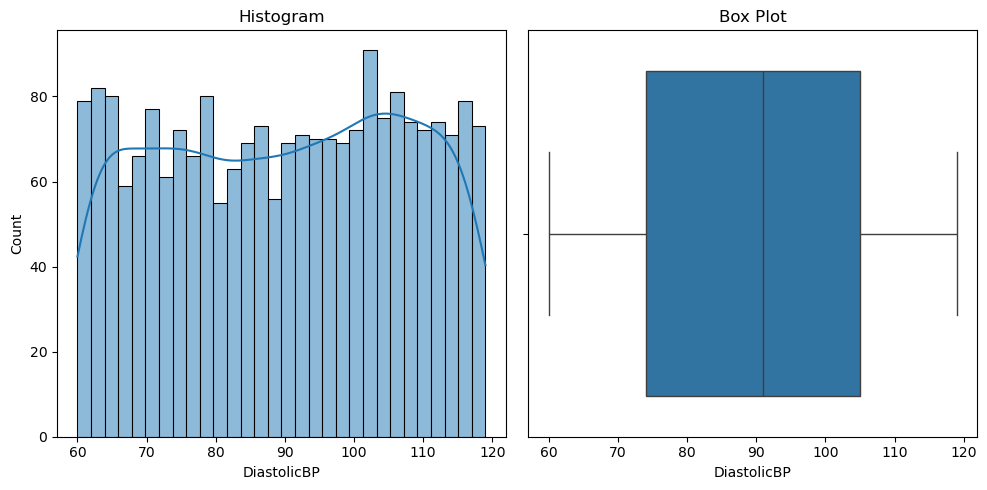

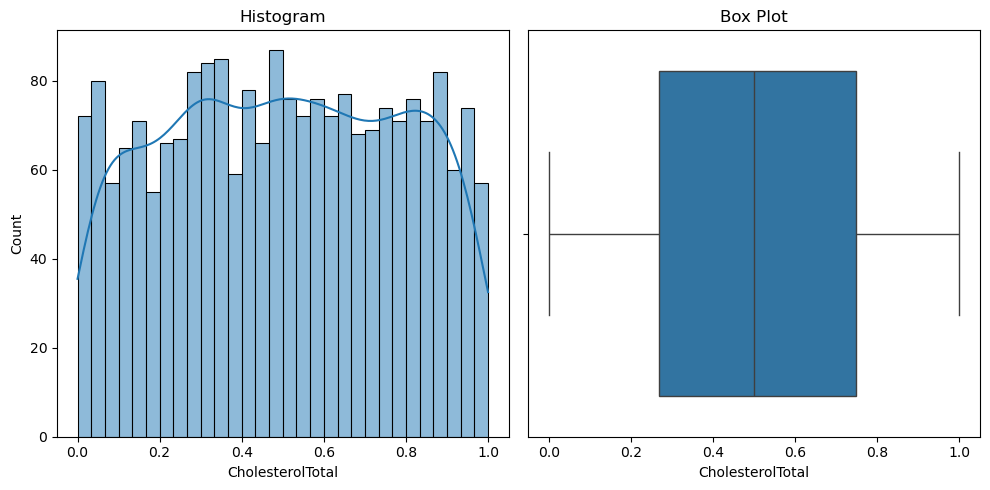

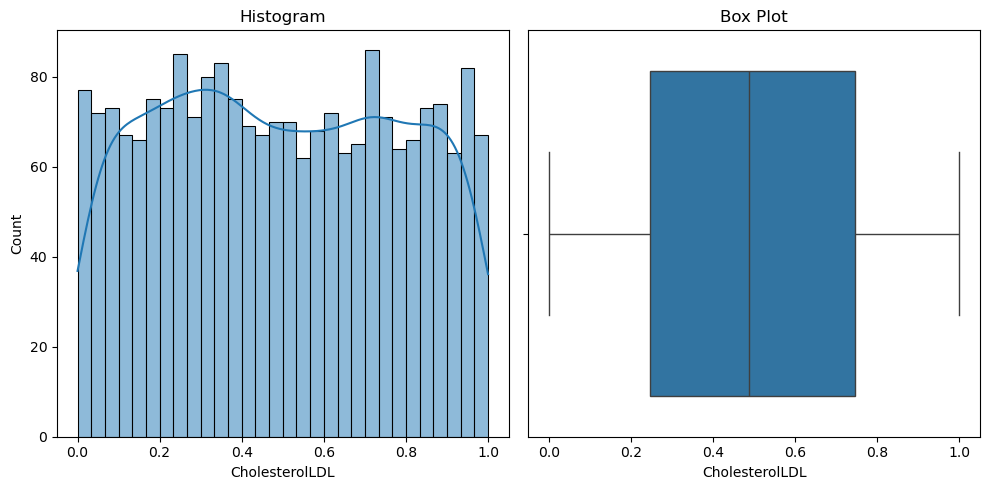

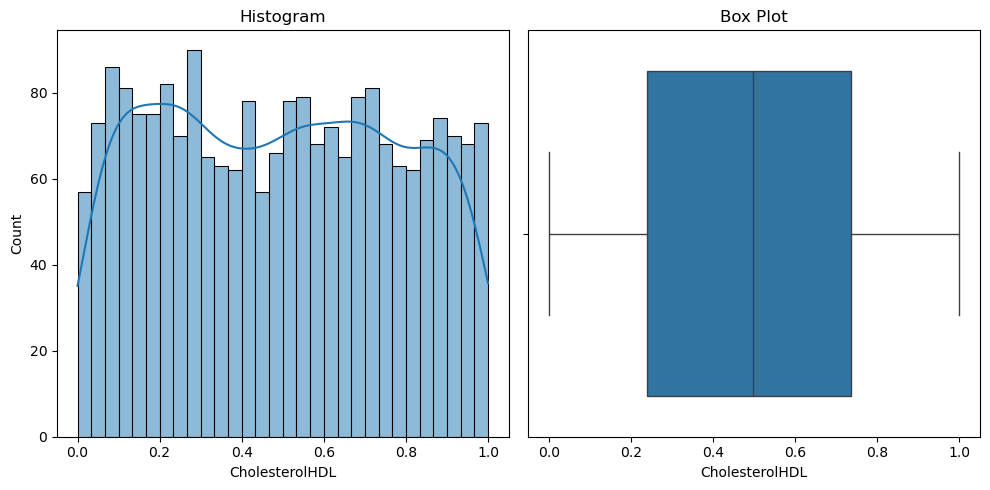

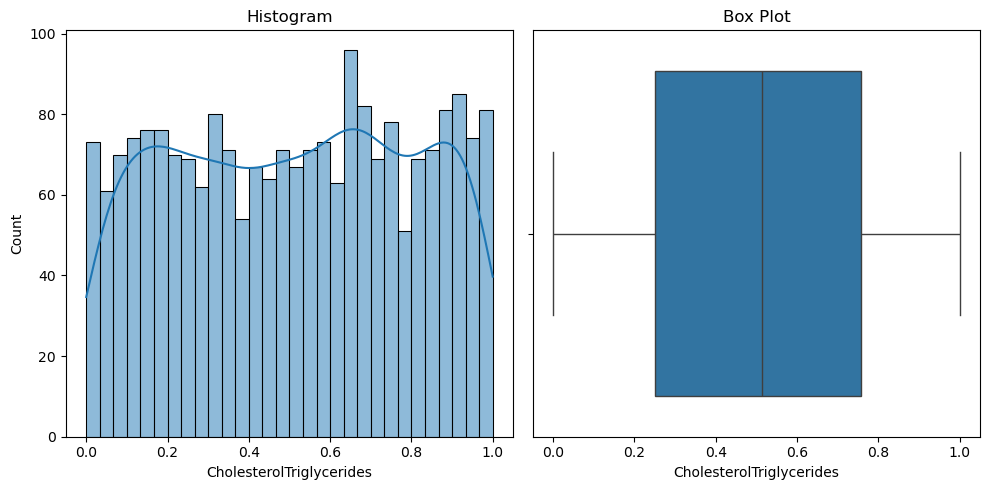

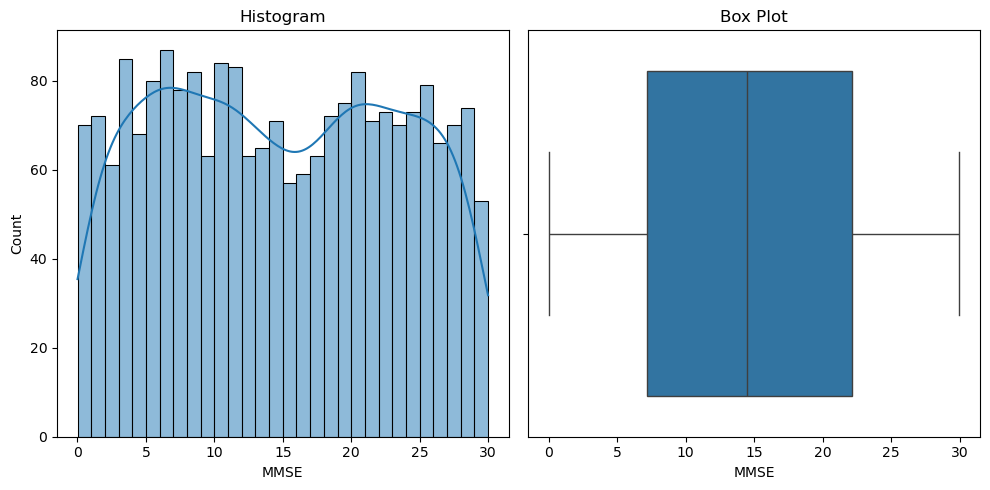

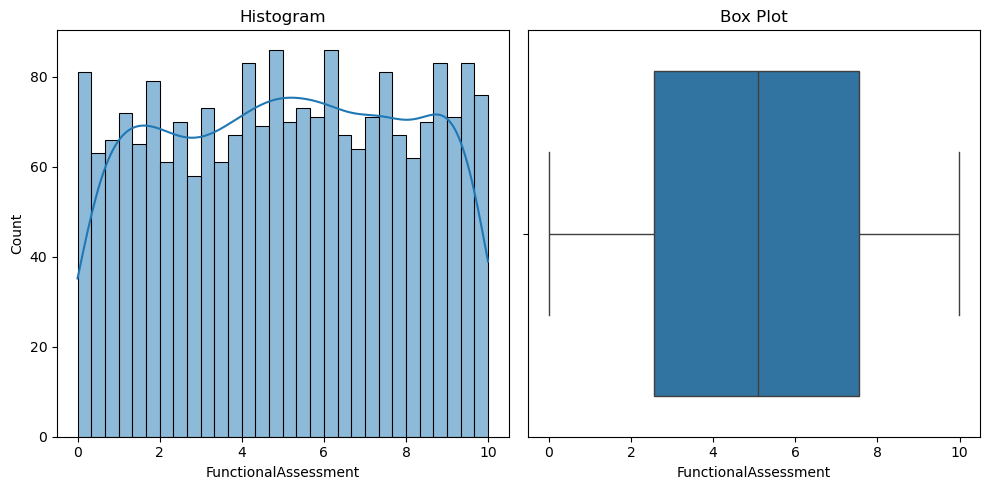

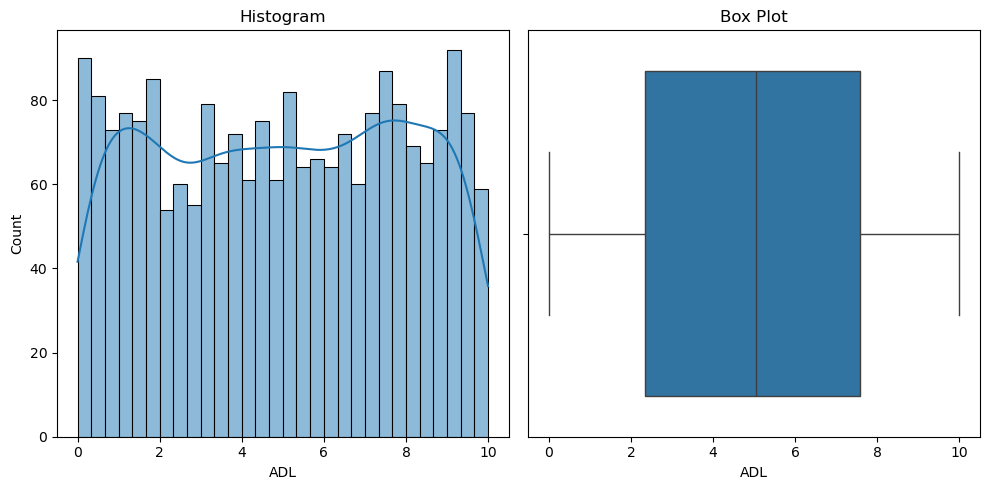

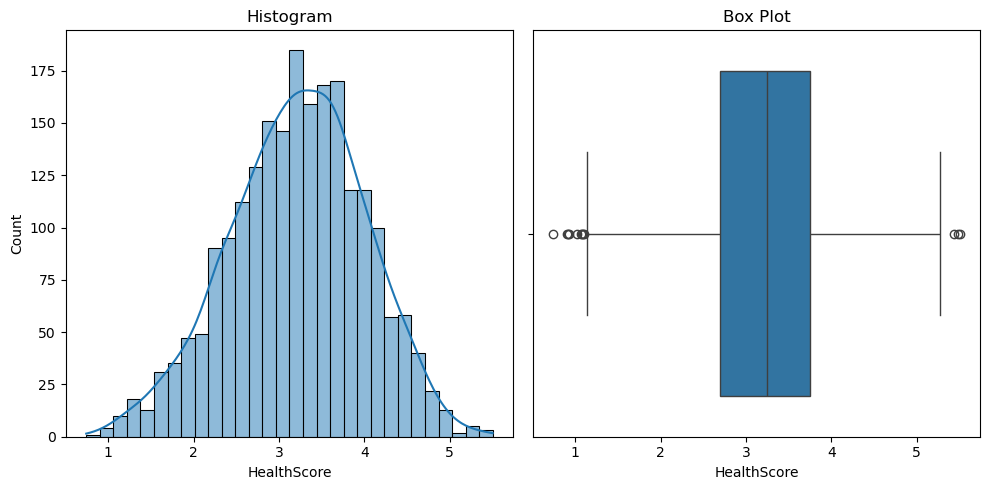

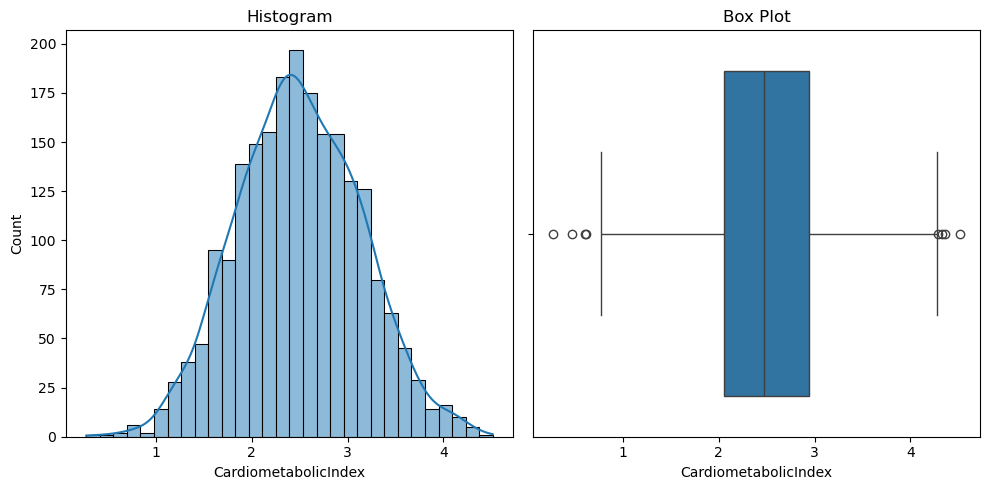

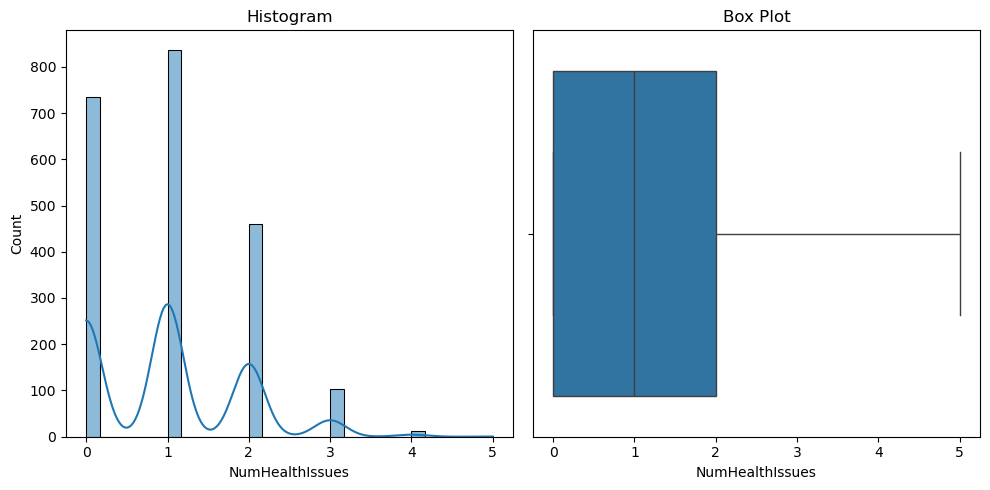

In [82]:
import seaborn as sns

# List of numerical features
num_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
                'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 'HealthScore', 'CardiometabolicIndex', 'NumHealthIssues']

# List of categorical features
cat_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
                'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
                'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'AgeGroup', 'EducationEthnicity']

# Loop through numerical features and plot
for feature in num_features:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title('Box Plot')

    plt.tight_layout()
    plt.show()


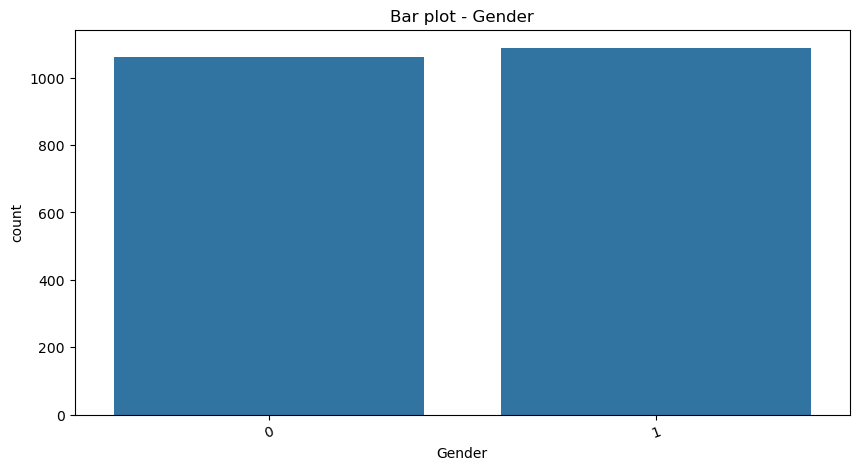

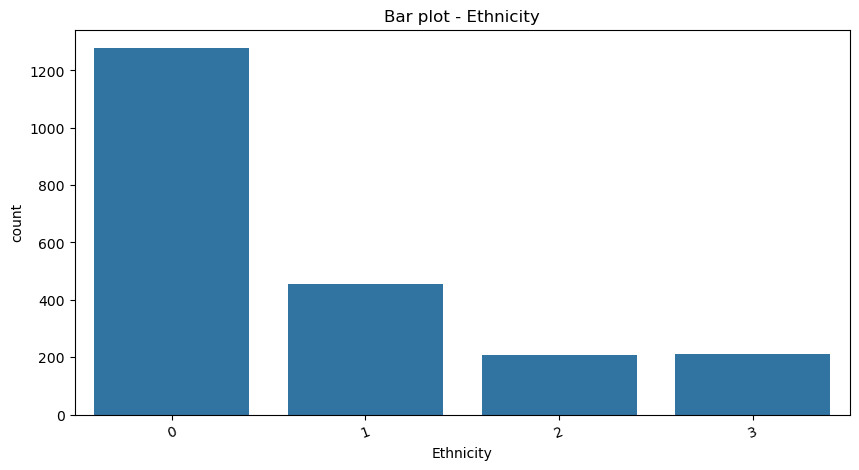

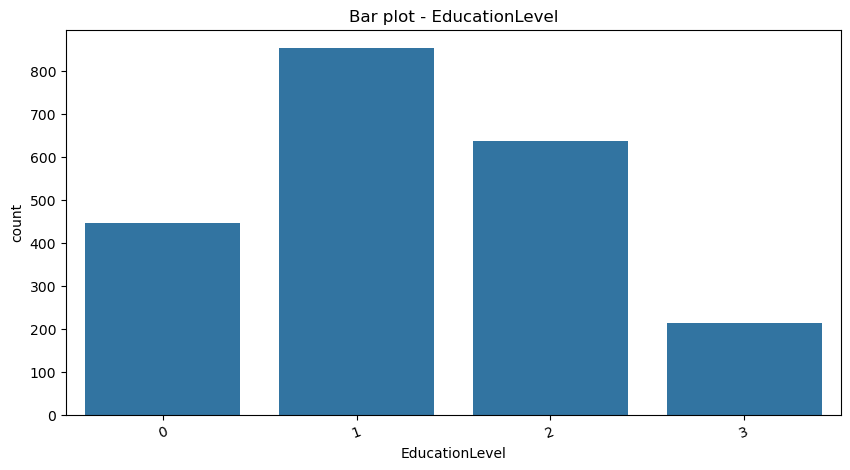

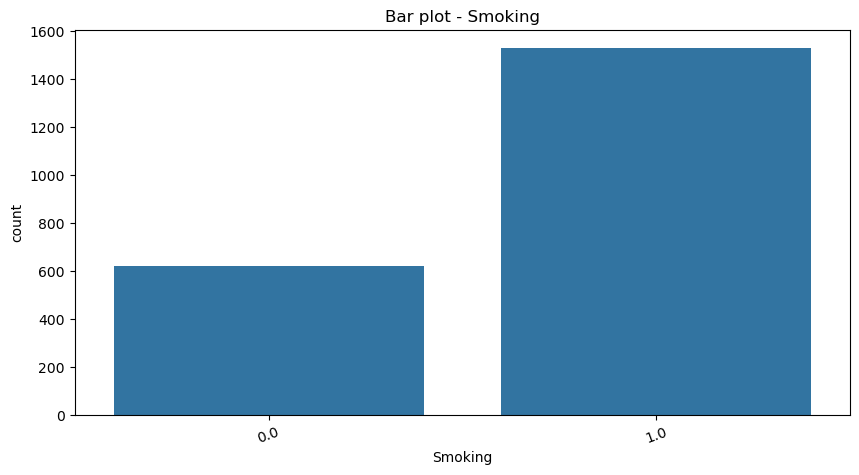

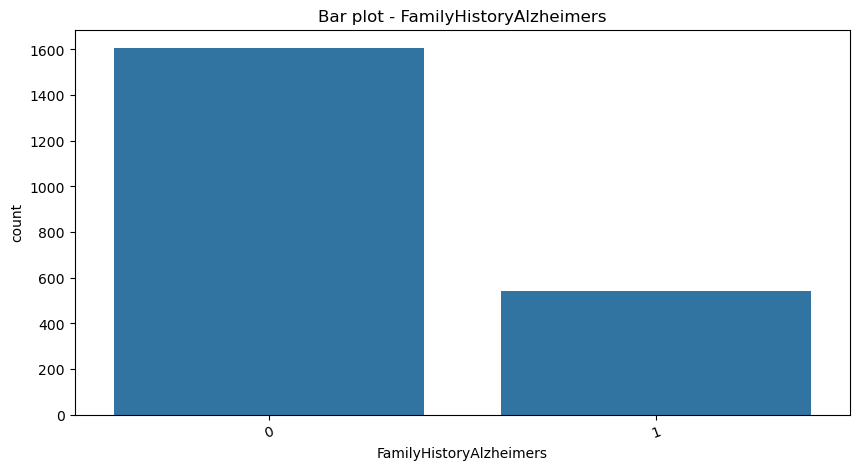

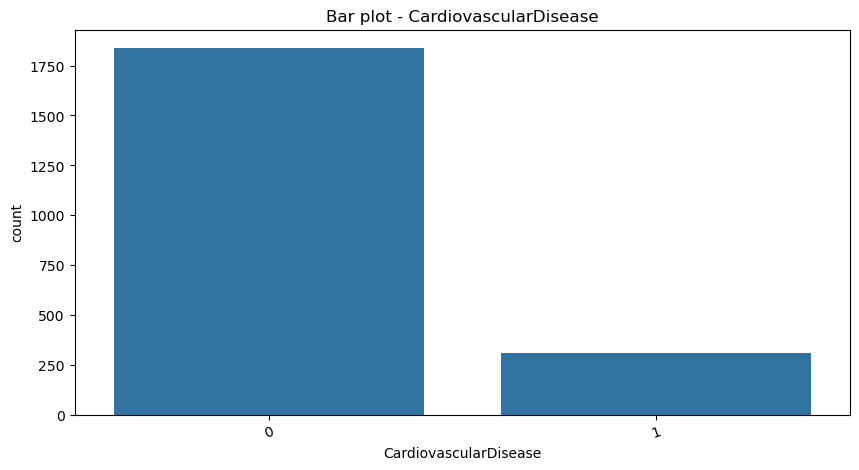

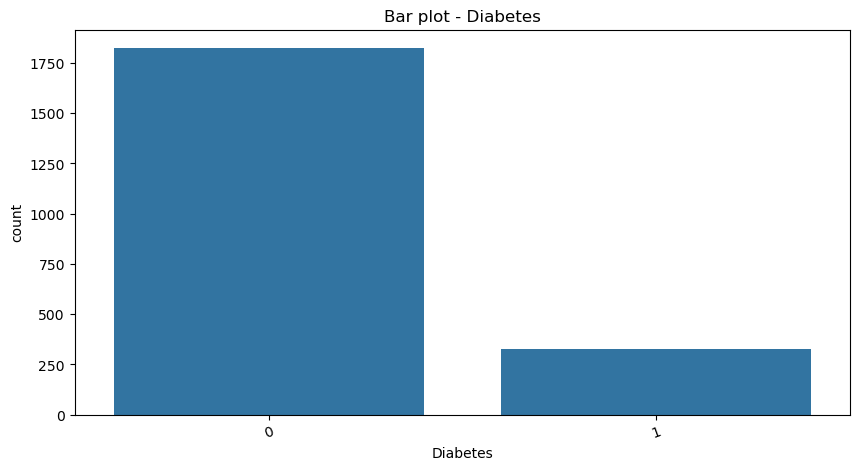

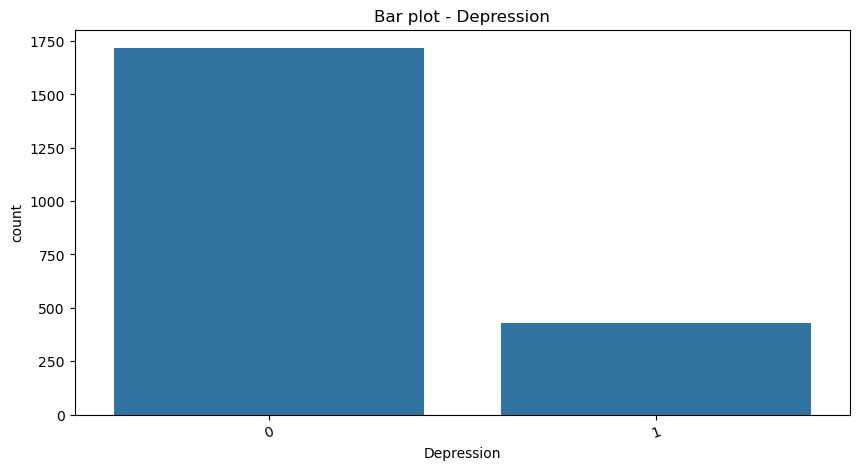

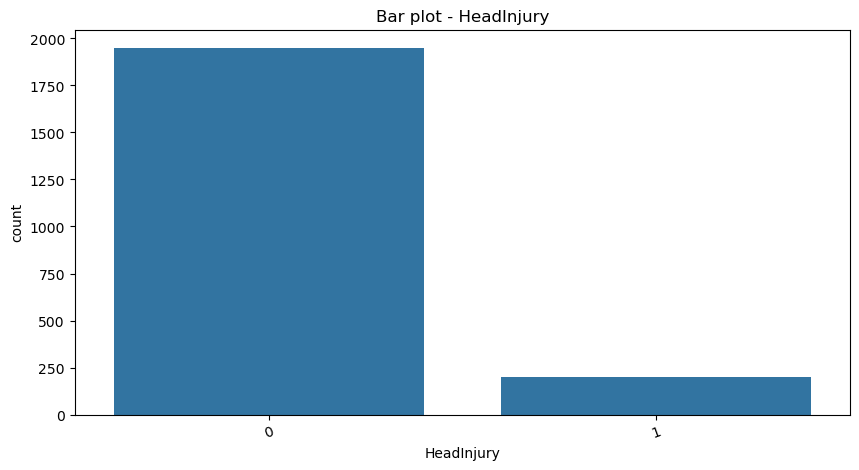

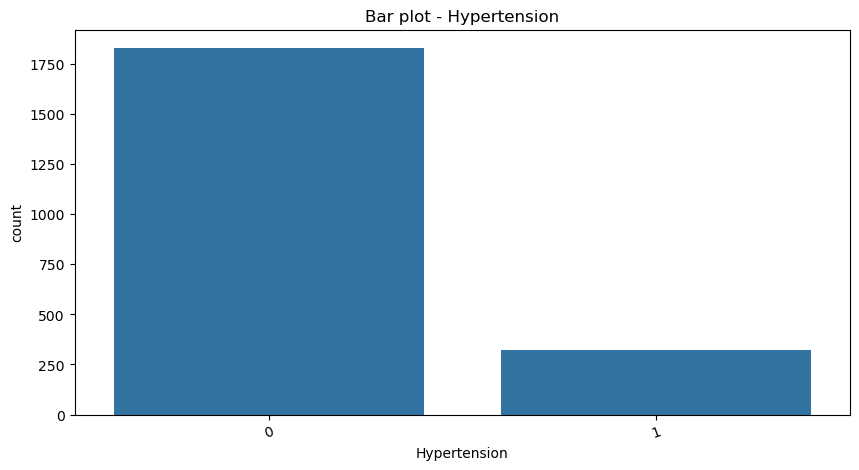

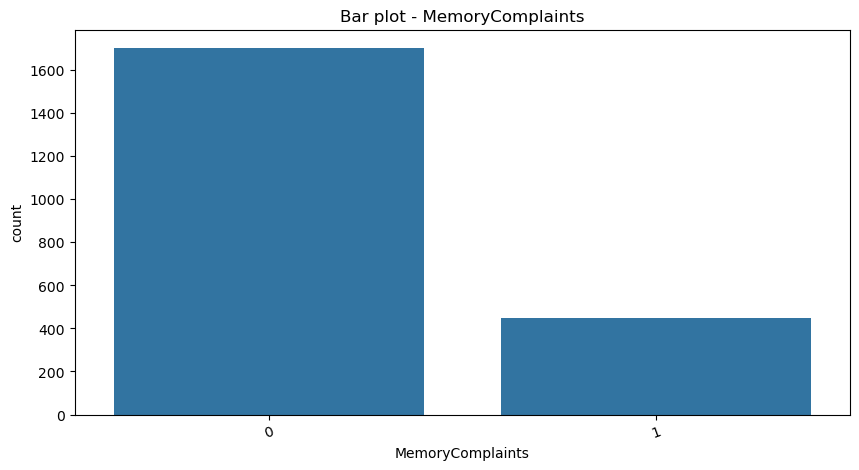

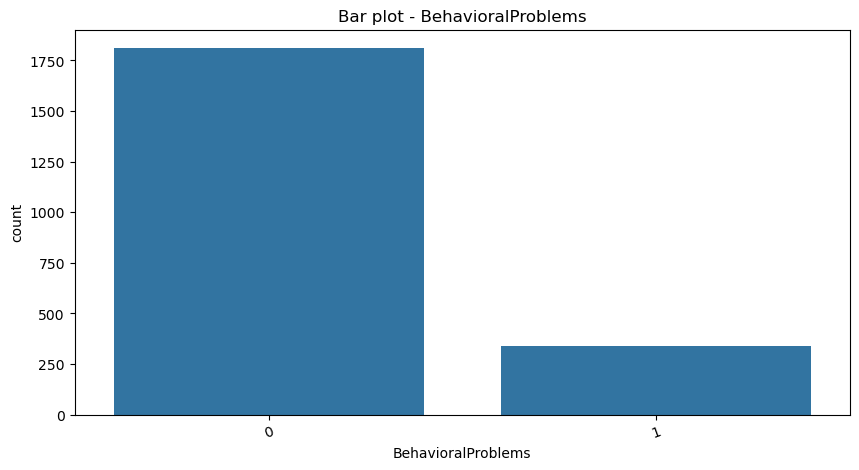

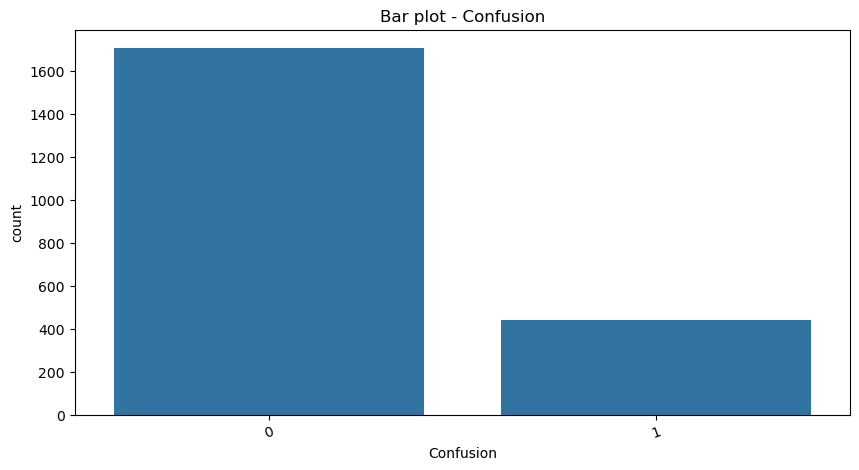

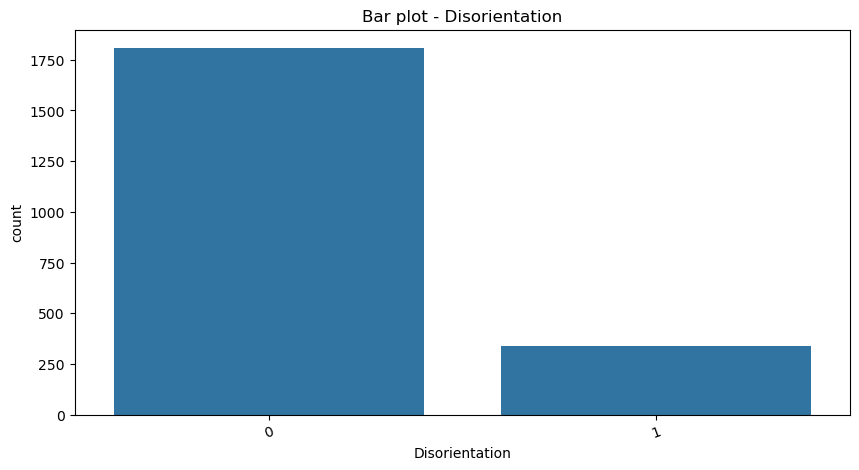

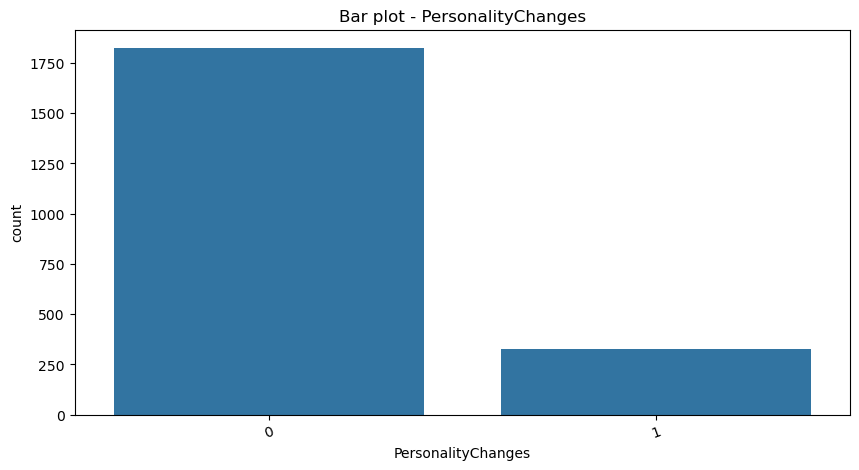

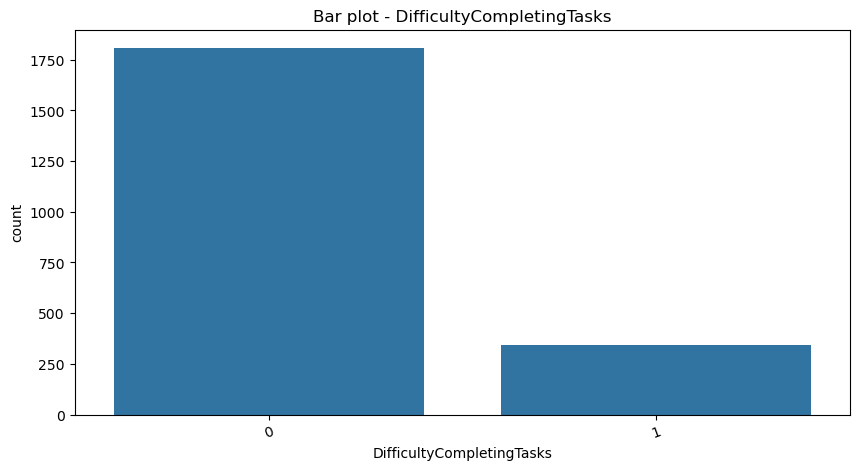

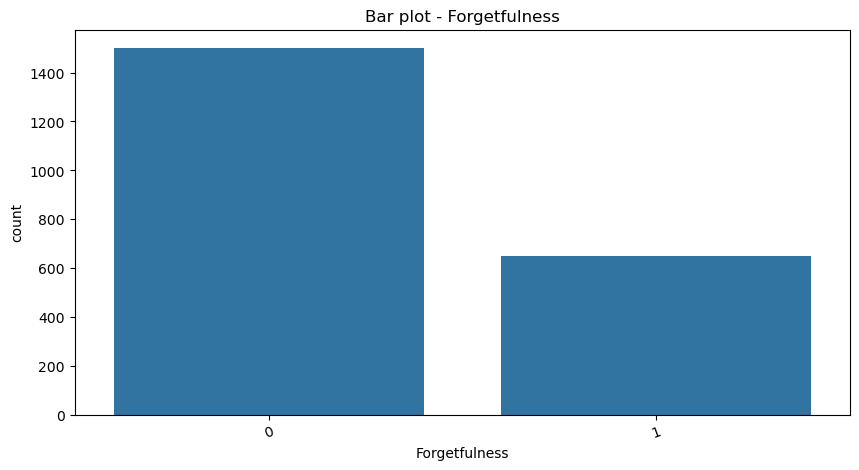

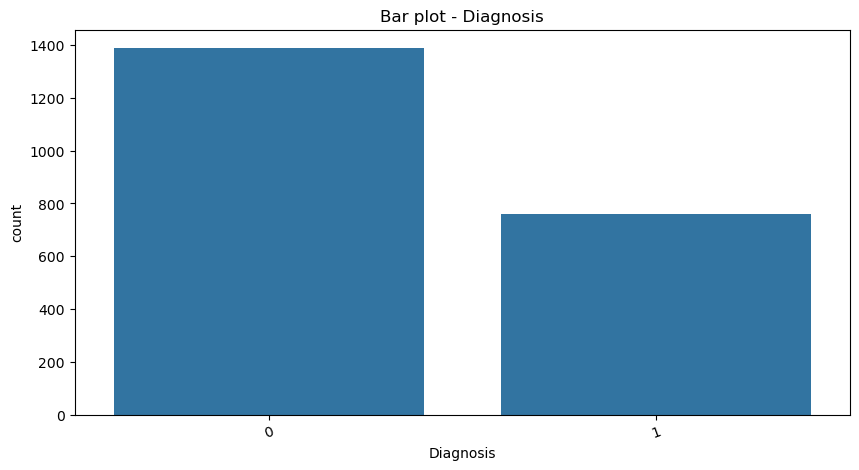

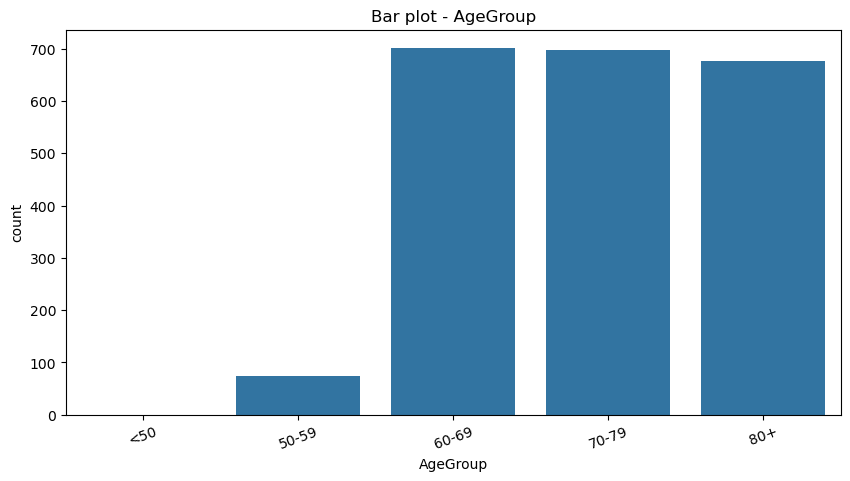

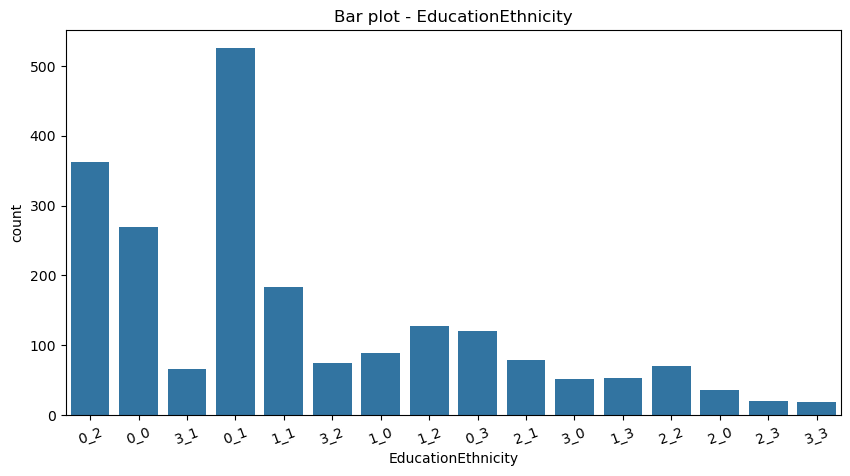

In [83]:
# Loop through categorical features and plot boxplot
for feature in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[feature])
    plt.title('Bar plot - ' + feature)
    plt.xticks(rotation=20)  # change the rotation according to your need
    plt.show()